In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # TES
import statsmodels.graphics.tsaplots as tsa_plots


In [2]:
cocacola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0,index_col=0,parse_dates=True)

In [3]:
cocacola.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


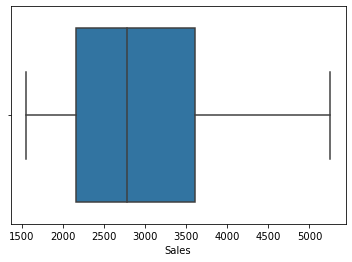

In [4]:
# Boxplot for ever
sns.boxplot('Sales',data=cocacola)

# moving average 

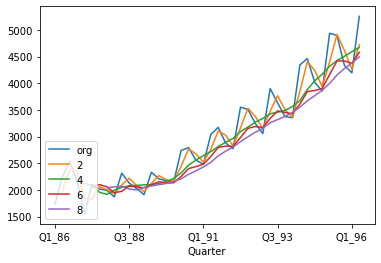

In [5]:
cocacola.Sales.plot(label="org")
for i in range(2,10,2):
    cocacola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

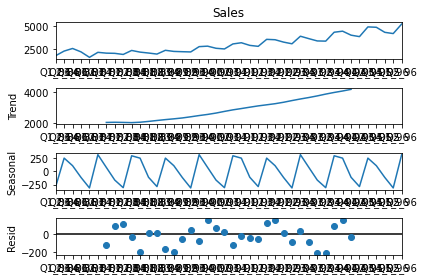

In [6]:
# Time series decomposition plot 
decompose_ts_add=seasonal_decompose(cocacola.Sales,period=12)
decompose_ts_add.plot()
plt.show()

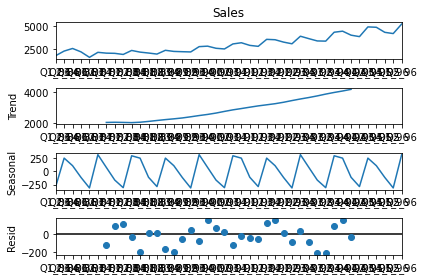

In [7]:
decompose_ts_add=seasonal_decompose(cocacola.Sales,period=12,model='additive')
decompose_ts_add.plot()
plt.show()

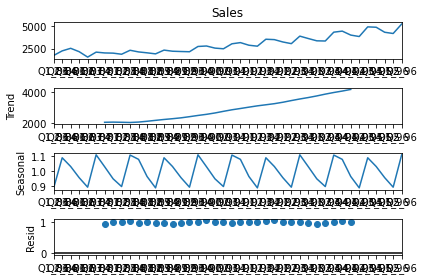

In [8]:
decompose_ts_add=seasonal_decompose(cocacola.Sales,period=12,model='multiplicative')
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots 

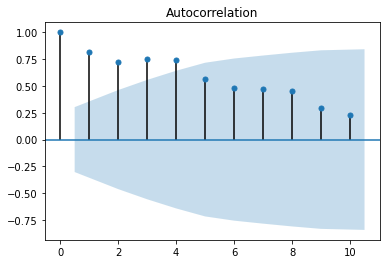

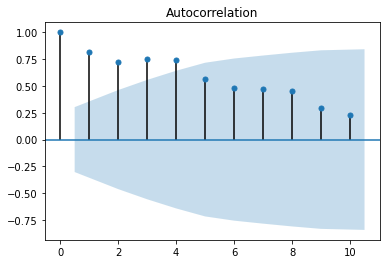

In [9]:
tsa_plots.plot_acf(cocacola.Sales,lags=10)

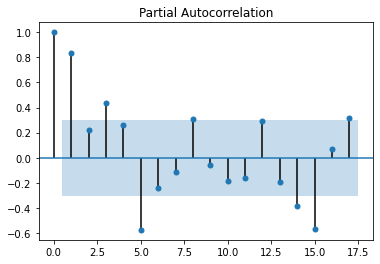

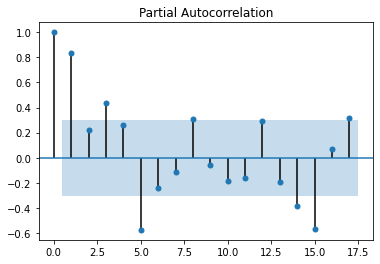

In [10]:
tsa_plots.plot_pacf(cocacola.Sales)

In [11]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [12]:
cocacola.shape

(42, 1)

In [13]:
# splitting the data into Train and Test data and considering the last 12 months data as 
# Test data and left over data as train data 


In [14]:
Train = cocacola.head(42)
Test =cocacola.tail(12)

In [15]:
Train.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [16]:
Test.head()

,Sales
Quarter,
Q3_93,3629.0
Q4_93,3373.0
Q1_94,3352.0
Q2_94,4342.0
Q3_94,4461.0


In [17]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [18]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

C:\Users\rohi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


9.765083736479207

In [19]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

C:\Users\rohi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\rohi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


9.77997334893774

In [20]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

C:\Users\rohi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\rohi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


3.1084135609871115

In [21]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

C:\Users\rohi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


2.3591735751198564

In [22]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

C:\Users\rohi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


42    5213.566871
43    4673.575015
44    4558.070216
45    5656.889026
46    5591.605572
47    5051.613716
48    4936.108916
49    6034.927726
50    5969.644272
51    5429.652416
dtype: float64

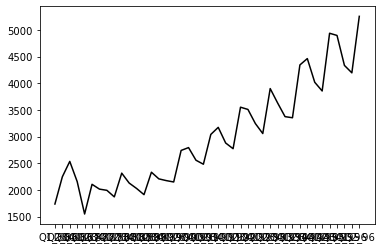

In [23]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Sales"], label='Train',color="black")

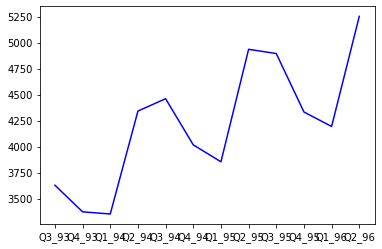

In [24]:
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")

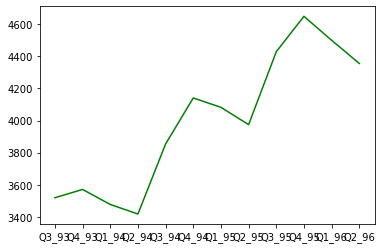

In [25]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")

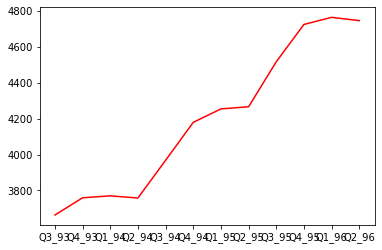

In [26]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")

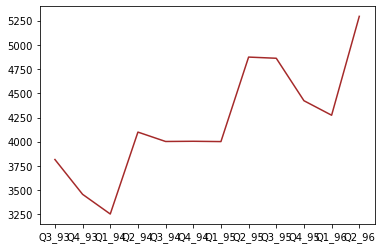

In [27]:
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")

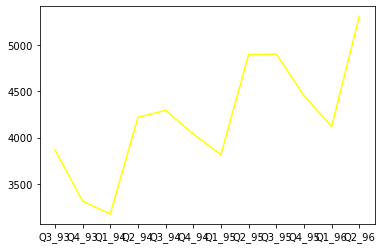

In [28]:
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
